In [2]:
import sys
from math import sqrt

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import bokeh
from bokeh.io import show, output_notebook, output_file
from bokeh.models import Plot, Range1d, MultiLine, Circle, StaticLayoutProvider
from bokeh.models import HoverTool, BoxZoomTool, ResetTool
from bokeh.models.graphs import from_networkx

In [3]:
print('NetworkX: {}'.format(nx.__version__))
print('Bokeh: {}'.format(bokeh.__version__))
print('Python: {}.{}.{}'.format(sys.version_info.major, sys.version_info.minor, sys.version_info.micro))

NetworkX: 2.2
Bokeh: 0.13.0
Python: 3.6.2


# Prepare Data

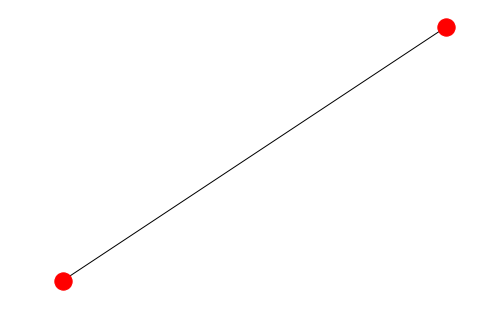

In [9]:
node_datasource_for_nx = [(1, {'size': 10, 'size_a': 10, 'size_b': 20}),
                          (2,{'size': 10, 'size_a': 10, 'size_b': 20})]

edge_datasource_for_nx = [(1, 2, {})]

G = nx.Graph()
G.add_nodes_from(node_datasource_for_nx)
G.add_edges_from(edge_datasource_for_nx)

fig = plt.figure()
pos = nx.spring_layout(G)
nx.draw(G)
plt.show()

# Convert the graph to Bokeh

In [11]:
graph_renderer = from_networkx(G, nx.spring_layout)

In [13]:
plot = Plot(plot_width=300, plot_height=300,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))

graph_renderer.node_renderer.glyph = Circle(size=15) 
graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", 
                                               line_alpha=0.8, 
                                               line_width=1)
plot.renderers.append(graph_renderer)

output_notebook()
show(plot)

Loading BokehJS ...